<a href="https://colab.research.google.com/github/Vasily95/final_project/blob/Vasily95-patch-1/%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BD%D0%B5%D1%82_%D0%BC%D0%B0%D0%B3%D0%B0%D0%B7%D0%B8%D0%BD_%C2%AB%D0%A1%D1%82%D1%80%D0%B8%D0%BC%D1%87%D0%B8%D0%BA%C2%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Проект. Описание

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Перед вами данные до 2016 года.

## Изучение данных из файла

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from math import ceil as math
games_pro = pd.read_csv('/datasets/games.csv')

In [ ]:
games_pro.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
5426,Fade to Black,PS,1996.0,Action,0.19,0.13,0.00,0.02,NaN,NaN,NaN
598,Monster Hunter Freedom 2,PSP,2007.0,Role-Playing,0.37,0.27,1.75,0.18,72.0,8.7,T
12821,Samurai Warriors 4: Empires,PSV,2015.0,Action,0.00,0.00,0.06,0.00,NaN,tbd,T
12739,Gormiti: The Lords of Nature!,DS,2010.0,Adventure,0.05,0.00,0.00,0.00,NaN,NaN,NaN
3280,Scribblenauts: Unlimited,3DS,2012.0,Action,0.56,0.01,0.00,0.05,73.0,7.4,E10+


Открыли таблицу, выведем информацию по датафрейму

In [ ]:
games_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
games_pro.duplicated().sum()

0

In [ ]:
games_pro['Year_of_Release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

In [ ]:
games_pro['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [ ]:
report = games_pro.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / games_pro.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
Critic_Score,8578,0.51
Rating,6766,0.40
User_Score,6701,0.40
Year_of_Release,269,0.02
Name,2,0.00
Genre,2,0.00
Platform,0,0.00
NA_sales,0,0.00
EU_sales,0,0.00
JP_sales,0,0.00


Составим таблицу по процентам пропусков в наших данных. Из нее мы видим, что большое количество пропусков в стобцах "Critic_Score", "Rating", "User_Score". В дальнейшем необходимо будет проверить можно ли как то заполнить пропущенные данные, избавится от них или оставить все как есть.

### Вывод

- Необходимо привести к типу (int) столбец : Year of Release
- Необходимо привести к нижнему регистру столбцы нашей таблицы
- Необходимо проверить, можем ли мы заменить имеющиеся пустые значения в таблице

## Подготовим данные

In [ ]:
games_pro.columns = games_pro.columns.str.lower()

Переведем название столбцов к нижнему регистру

In [ ]:
games_pro.dropna(
    subset = ['year_of_release'], inplace = True
                 )
games_pro['year_of_release'] = games_pro['year_of_release'].astype('int64')

Доля пропущенных значений в данных по годам релиза составляет около 2 процентов, поэтому было решено удалить их. После преобразуем оставшиеся значения столбца "year_of_release" в тип данных 'int'

In [ ]:
games_pro[games_pro['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [ ]:
games_pro.dropna(subset=['name'], inplace=True)

Проверили 2 пропуска в столбцах "name" и "genre". Строки совпадают, от них тоже можем избавиться.

In [ ]:
games_pro['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.2       2
1.5       2
1.9       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [ ]:
games_pro['user_score'].replace('tbd', 'Nan', inplace=True)

In [ ]:
games_pro['user_score'] = games_pro['user_score'].astype('float')

В нашей таблице нам встречается название tbd.

  Выяснили, что аббревиатура tbd значит "to be determined"(предстоит определить). Скорее всего данные не были заполнены пользователей, либо часть пользователи просто не определились с рейтингом. Для дальнейшего исследования заменяем заменяем аббревиатуру "tbd" на значение "Nan" и приводим тип данных в столбце к 'float'

In [ ]:
def game_total_sum(row):
    na = row['na_sales']
    eu = row['eu_sales']
    jp = row['jp_sales']
    os = row['other_sales']
    total_sale = 0
    total_sale = na + eu + jp + os
    return total_sale

In [ ]:
games_pro['profit'] = games_pro.apply(game_total_sum, axis=1)

In [ ]:
games_pro.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,profit
11914,Kidou Senshi Gundam: Giren no Yabou - Axis no ...,PS2,2009,Strategy,0.00,0.00,0.07,0.00,NaN,NaN,NaN,0.07
15935,Final Fantasy XI: All-In-One Pack 2006,X360,2006,Role-Playing,0.00,0.00,0.02,0.00,NaN,NaN,NaN,0.02
1167,Pokemon Battle Revolution,Wii,2006,Role-Playing,0.78,0.37,0.30,0.13,53.0,6.7,E,1.58
1189,Fight Night Round 3,PS2,2006,Fighting,1.07,0.40,0.00,0.10,84.0,8.1,T,1.57
16104,Nobunaga no Yabou Online: Houou no Shou,PS3,2012,Strategy,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Для определения суммарных продаж во всех регионах и создания отдельного столбца с ними решил написать функцию, которая посчитает значения в столбцах "na_sales","eu_sales","jp_sales","other_sales".С помощью метода apply() создадим новый столбец, выведем случайные 5 строк для наглядного результата.

  (Также можно было просто просуммировать столбцы df[1] = df[2]+ df[2]+ df[3], но было интересно воспользоваться именно функцией def)

### Вывод

- Привели значения столбцов к нижнему регистру
- Удалили пропущенные значения в столбцах 'year_of_release', 'genre' и 'name'
- Пропущенные данные могли возникнуть либо из-за их утери, либо пользователи и критики не смогли определиться с рейтингом. Такая ситуация могла возникнуть из - за непопулярности некоторых игр. 
- Создали столбец с суммарными продажами

## Проведем исследовательский анализ данных

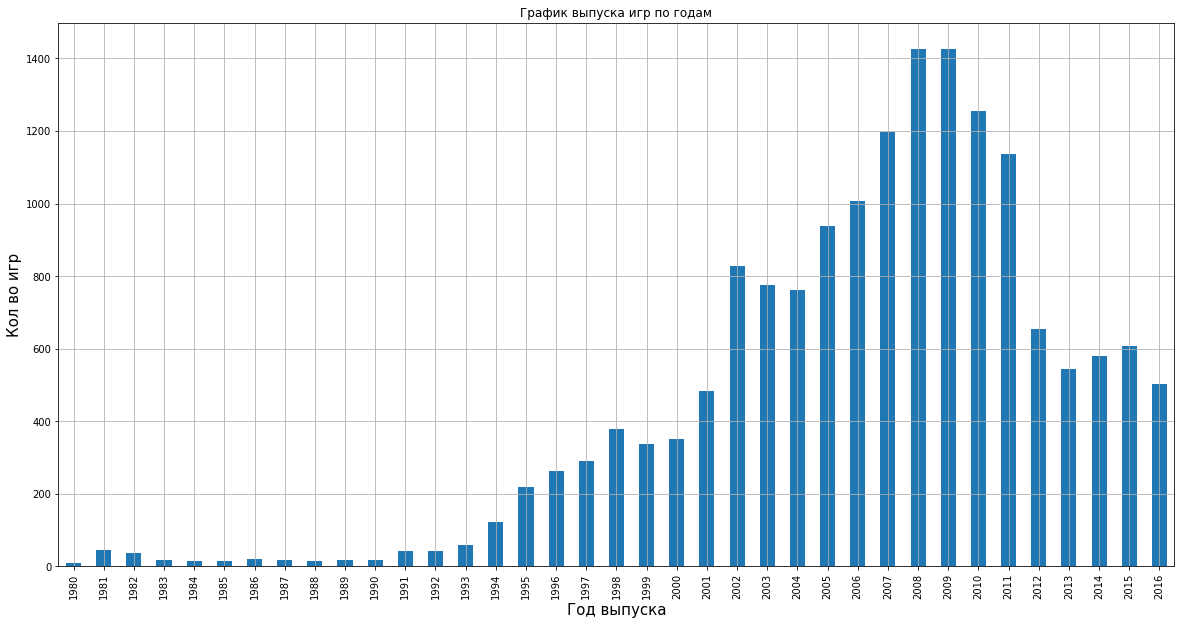

In [ ]:
games_on_period = games_pro.groupby('year_of_release')['name'].count()
games_on_period.plot(
    x = 'year_of_release',y = 'count',kind = 'bar', figsize = (20,10), 
    title = 'График выпуска игр по годам', grid = True)
plt.xlabel('Год выпуска', fontsize=15)
plt.ylabel('Кол во игр', fontsize=15)
plt.show()

In [ ]:
#games_on_period = games_pro.groupby('year_of_release')['name'].count()
#games_on_period.plot(
    #x='year_of_release',y='count',kind='pie', figsize = (20,10), 
    #title = 'График выпуска игр', grid = True)
#plt.xlabel('Год выпуска', fontsize=15)
#plt.ylabel('Кол во игр', fontsize=15)
#plt.show()

Для того, чтобы проверить сколько игр выпускалось в разные годы, сгруппируем данные по году выпуска и посчитаем количество игр. Из графика видно, что количество игр начало увеличиваться с большой скоростью с 1995 г. до 2009 г. Причина такого быстрого подъема - развитие технологий. Так например самая популярная приставка PlayStation, на которую приходилось огромное количество игр была выпущена компанией Sony именно в 1994 г.
  
  После 2009 мы можем наблюдать спад иговой индустрией. Многие связывают это с появлением приложений и игр на мобильных устройствах.

In [ ]:
top_platform = games_pro.pivot_table(
    index = 'platform', values = 'profit', aggfunc = 'sum').sort_values(
    by = 'profit', ascending=False).head(6)

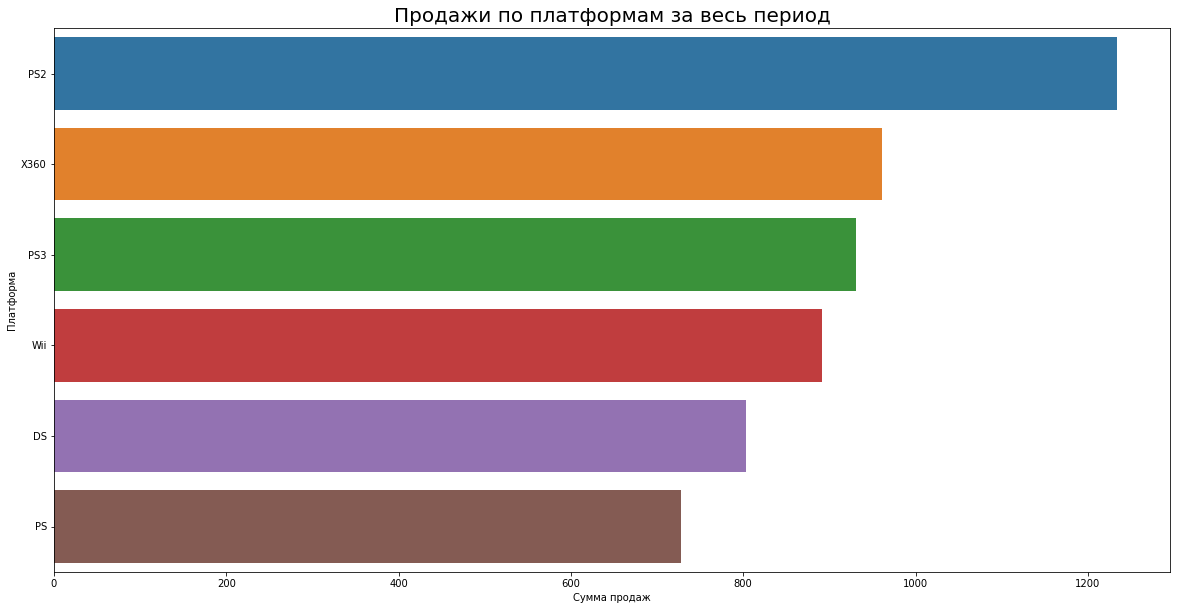

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x = top_platform['profit'],y = top_platform.index)
plt.title("Продажи по платформам за весь период", fontsize = 20)
plt.xlabel("Сумма продаж", fontsize = 10)
plt.ylabel("Платформа", fontsize = 10)
plt.show()

In [ ]:
top_platform = top_platform.reset_index()
top_platform

,platform,profit
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58


Определим платформы с наибольшими суммарными продажами. В нашем случае я выбрал 6 самых прибыльных платформ, построил график и вывел таблицу с суммарными продажами. Самыми продаваемыми играми за все время стали игры на платформах "PS2", "X360" "PS3", "Wii" 

In [ ]:
top_platform_list = top_platform['platform'].unique()

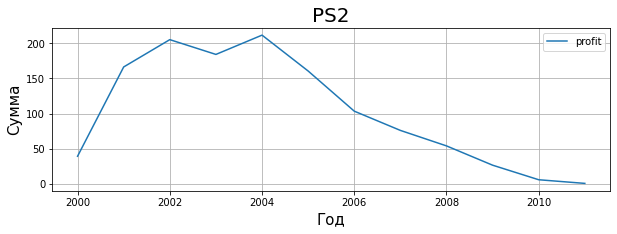

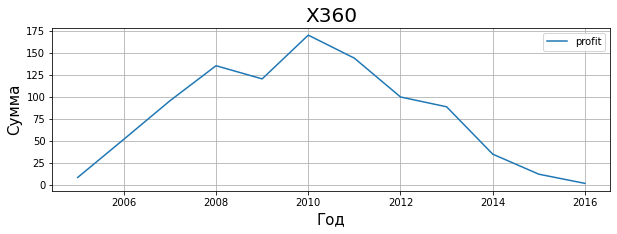

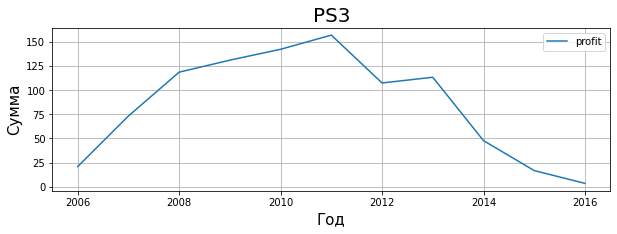

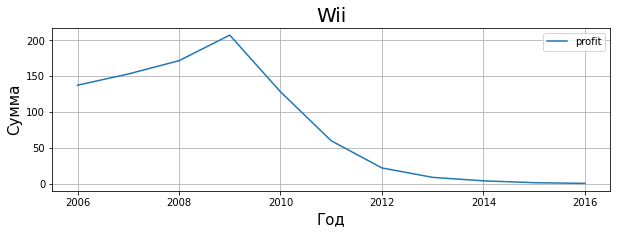

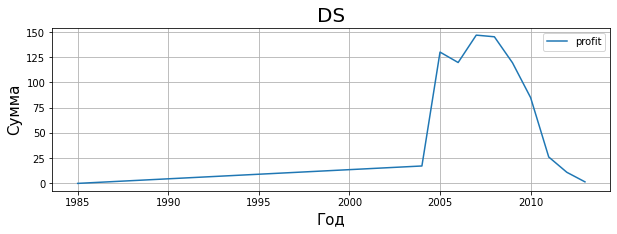

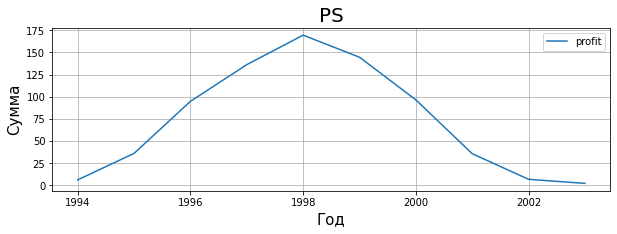

In [ ]:
for platform in top_platform_list:
    games_pro[games_pro['platform'] == platform].pivot_table(
        index = 'year_of_release', values = 'profit', aggfunc = 'sum').plot(
        kind = 'line', figsize = (10,3), grid = True)
    plt.title(platform, fontsize = 20)
    plt.xlabel('Год', fontsize = 15)
    plt.ylabel('Сумма', fontsize = 15)
plt.show()

Построим распределение по годам для каждой платформы (специально вывел каждую платформу, т.к. если вывести их все, на мой взгляд график кажется менее информативным). Для этого создадим список платформ, также воспользуясь методом unique().
Из данных графиков мы видим, что игровые платформы в среднем существуют около 10 лет, пик продаж приходится примерно на 5 год после их появления. 

In [ ]:
life_data = games_pro.query('2016 > year_of_release > 2012')
games_pro_2012 = life_data.pivot_table(
    index = 'year_of_release', columns = 'platform', values = 'profit', aggfunc = 'sum'
                                       )
games_pro_2012

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14


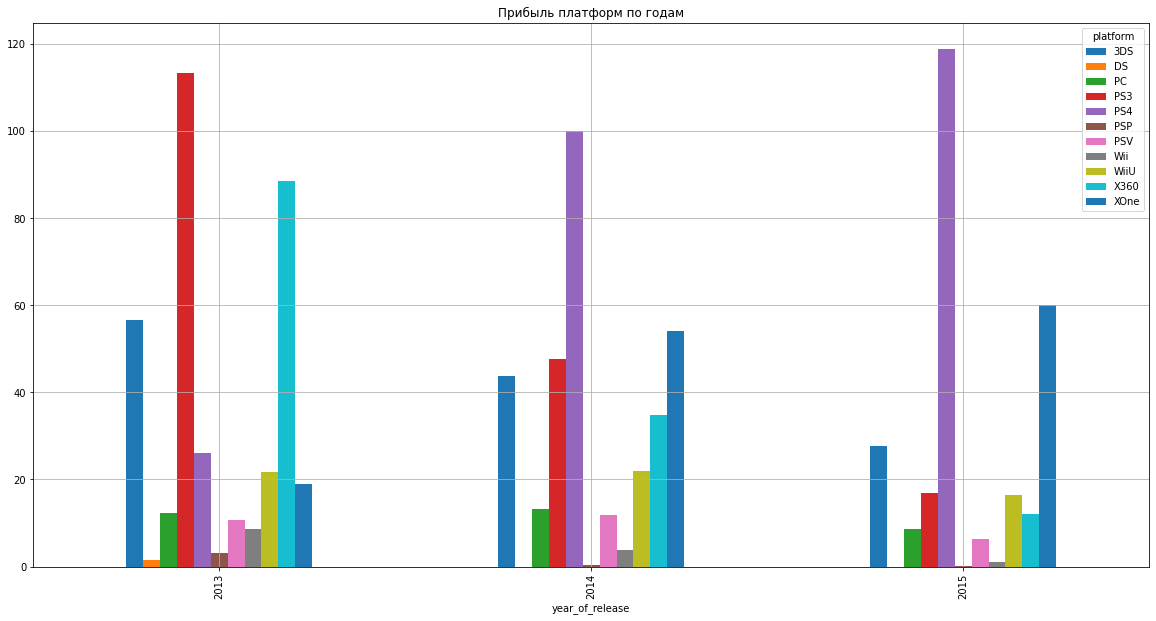

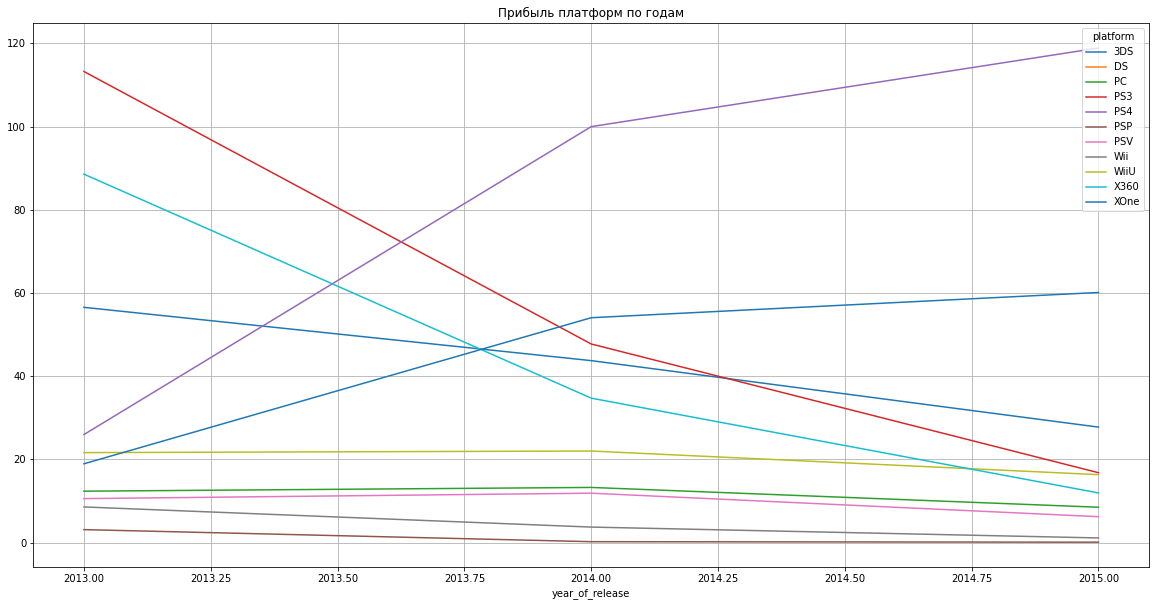

In [ ]:
games_pro_2012.plot(kind = 'bar', figsize = (20,10), grid = True, title = 'Прибыль платформ по годам')
games_pro_2012.plot(kind = 'line', figsize = (20,10), grid = True, title = 'Прибыль платформ по годам')
plt.show()

Из предыдущего исследования можно определить актуальный период. В игровых индустриях для целей прогноза “продаж на ближайший год” обычно берут интервал в 2-3 года. Если брать промежуток больше, то мы можем захватить тренды в играх, которые уже устарели. Поэтому будем считать, что наш актуальный период находится в промежутке 2013 - 2015 гг. Также необходимо помнить, что данные за 2016 г. могут быть неполными(год еще не закончился), а значит мы не будем ,в рассчет 2016 г.
Построим таблицу, и 2 графика - столбчатый и линейный.
Из графиков мы наблюдаем следующее:
- на основе пары X360 и XOne. В связи с выходом платформы нового поколения XOne, количество покупок игр на данную платформу стремительно увеличивается, в связи с этим, прибыль платформы X360 идет на нет.  По графику видим, что XOne находится на пике своего "развития"
- подобную ситуацию мы наблюдаем в паре PS3 и PS4: продажи игр на новую платформу стремительно растут, а продажи PS3, наоборот, стремительно падают. 	

In [ ]:
games_pro_2012_top = games_pro_2012[['PS4','X360','PS3','XOne']]
games_pro_2012_top

platform,PS4,X360,PS3,XOne
year_of_release,,,,
2013,25.99,88.58,113.25,18.96
2014,100.00,34.74,47.76,54.07
2015,118.90,11.96,16.82,60.14


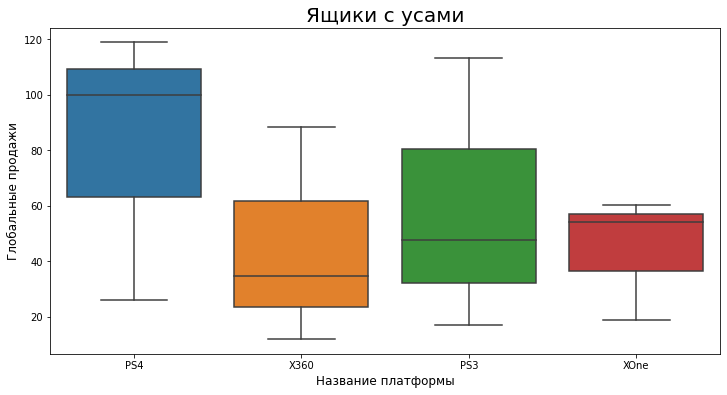

In [ ]:
plt.figure(figsize = (12,6))
sns.boxplot(data = games_pro_2012_top)
plt.title('Ящики с усами', fontsize = 20)
plt.xlabel('Название платформы', fontsize = 12)
plt.ylabel('Глобальные продажи',fontsize = 12)
plt.show()

Выберем платформы "PS4"	"X360" "PS3" "XOne" для построения ящиков с "усами". Исходя из графиков видно, что медиана протекает у всех по разному.

  Мы видим, что медианы "PS4" и "XOne" находится ближе к верхним значениям(значит был резкий скачок в продажах)
  

In [ ]:
play_station_4 = games_pro[games_pro['platform'] == 'PS4']

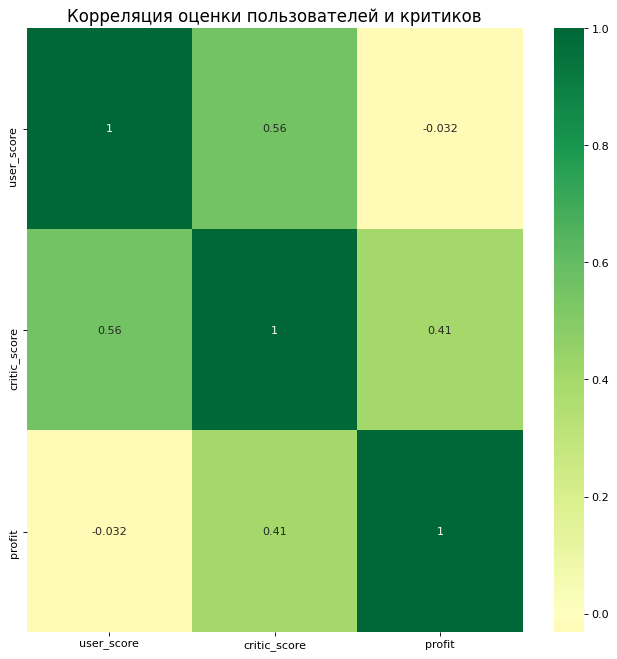

In [ ]:
plt.figure(figsize=(10,10), dpi= 80)
sns.heatmap(
    play_station_4[['user_score','critic_score','profit']].corr(),
    xticklabels=play_station_4[['user_score','critic_score','profit']].corr().columns, 
    yticklabels=play_station_4[['user_score','critic_score','profit']].corr().columns, 
    cmap='RdYlGn', center=0, annot=True
            )
plt.title('Корреляция оценки пользователей и критиков', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

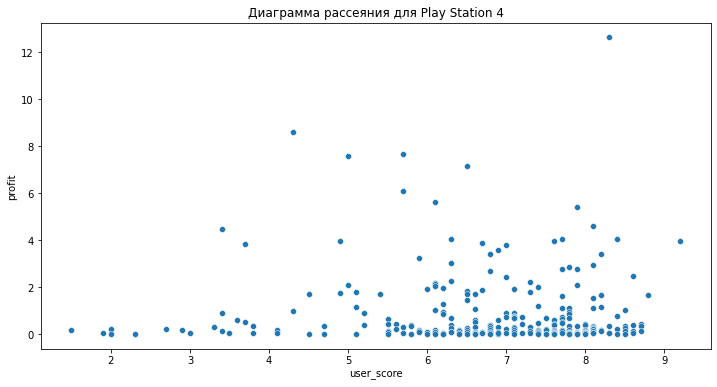

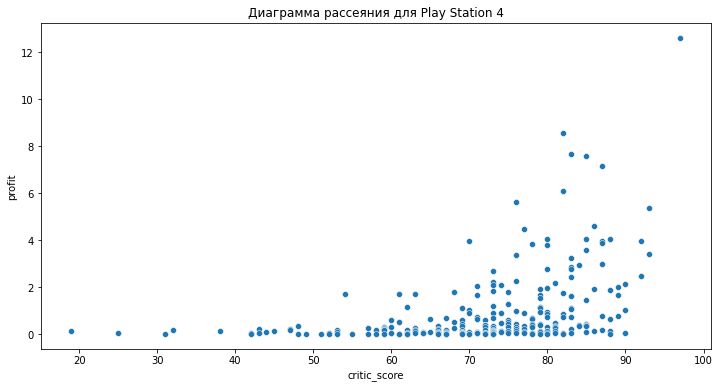

In [ ]:
for column in play_station_4[['user_score','critic_score']]:
    plt.figure(figsize=(12,6))
    sns.scatterplot(x=column, y='profit', data=play_station_4)
    plt.title('Диаграмма рассеяния для Play Station 4')

Посмотрм, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Для этого выберем платформу 'PS4', которая приближается к пику продаж. Построим для нее "тепловую карты" корреляции и диаграмму рассеяния.
  Из графиков мы видим, что:
 - для игры на платформу важна оценка критиков. Это подтверждает и карта корреляции, где есть положительная зависимость.
 - корреляция продаж и оценки пользователей фактически отсутствует из чего можно сделать вывод, что оценка пользователей слабо влияет на продажи.

In [ ]:
games_pro_top4 = ['PS4','X360','PS3','XOne']
def other_platform_dia(platform_name):
    platform = games_pro[games_pro['platform'] == platform_name]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x = 'critic_score', y = 'profit', data = platform, ax = ax[0])
    sns.scatterplot(x = 'user_score', y ='profit', data=platform, ax = ax[1])
    fig.suptitle(platform_name, fontsize=20)
    ax[0].set(xlabel = 'Оценка критиков')
    ax[1].set(xlabel = 'Оценка пользователей')
    ax[0].set(ylabel = 'Количество продаж')
    ax[1].set(ylabel = 'Количество продаж')
    plt.show()


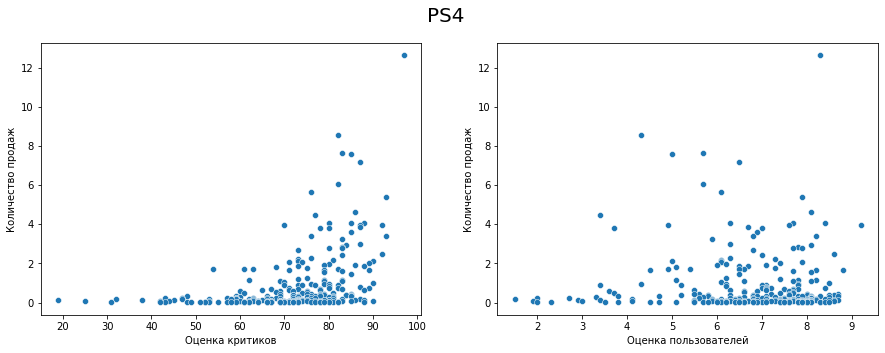

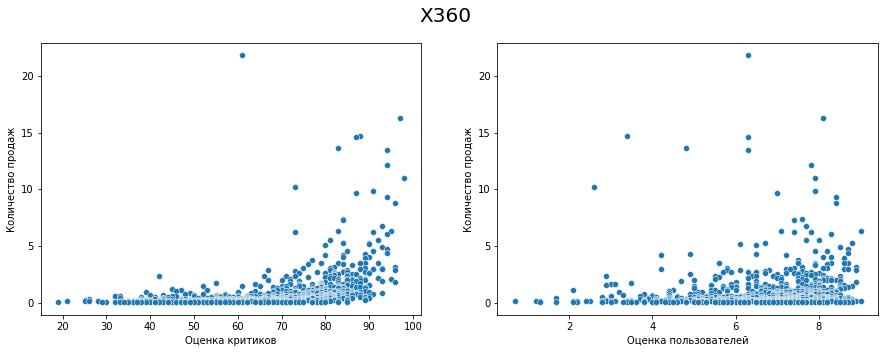

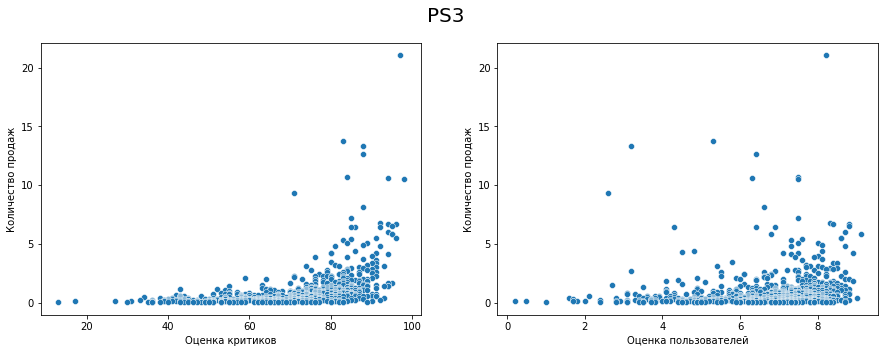

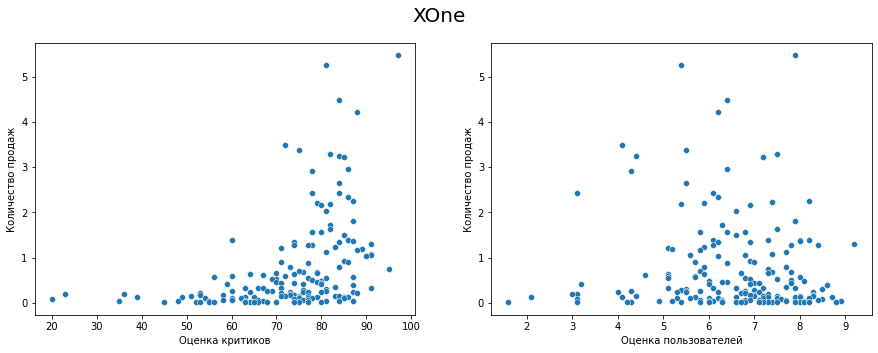

In [ ]:
for platform in games_pro_top4:
    other_platform_dia(platform)

In [ ]:
games_pro.query('platform in @games_pro_top4').pivot_table(index = 'platform',  
                 values = ['user_score','critic_score','profit'], 
                 aggfunc = ['corr']).T.style.format('{:.2f}')

Соотнесем продажи игр на PS4 с продажами игр на других платформах. Для этого возьмем наш список 'PS4','X360','PS3','XOne' и напишем функцию, которая построит графики рассеяния для каждой платформы, а также составим сводную таблицу, в которую запишем корреляцию между оценкой критиков, пользователей и продажами для каждой платформы. Из полученных данных мы видим:
  - в среднем корреляция оценки критиков находится на уровне 0.4%, что подтверждает наше мнение, о том, что критики является важным фактором для продажи игр
  - почти для всех платформ корреляция оценки пользователей стремится к 0. Из этого также делаем вывод, что пользователи больше прислушиваются к экспертному мнению чем к оценкам других пользователей


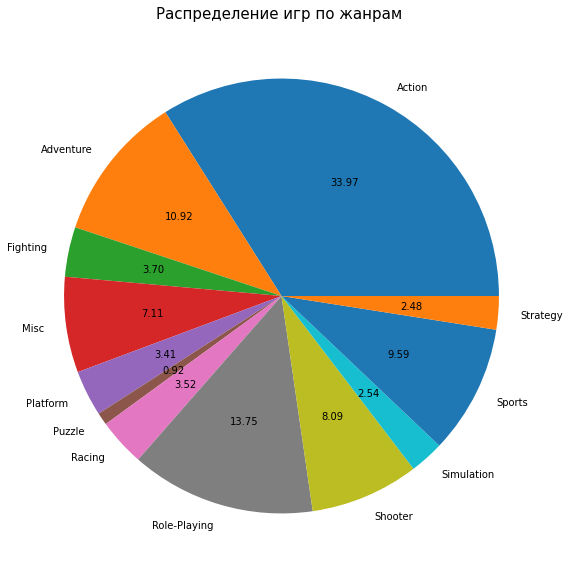

In [ ]:
count_genre = life_data.groupby('genre')['genre'].count()
genres_name = count_genre.index
plt.figure(figsize = (20,10))
plt.pie(x = count_genre, labels = genres_name, autopct = "%.2f")
plt.title('Распределение игр по жанрам ',fontsize = 15)
plt.show()

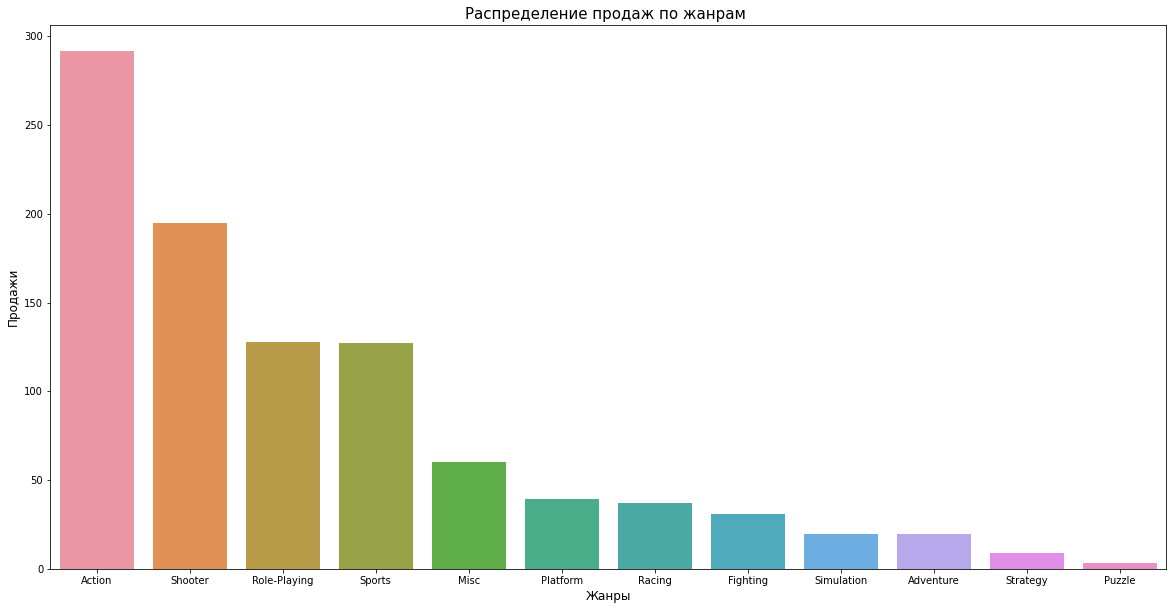

In [ ]:
profit_genre = life_data.pivot_table(
    index = 'genre', values = 'profit', aggfunc = 'sum').sort_values(by = 'profit', ascending=False
                                                              ).reset_index()
plt.figure(figsize = (20,10))
plt.title('Распределение продаж по жанрам ',fontsize=15)
sns.barplot(data=profit_genre, x = 'genre', y = 'profit')
plt.xlabel('Жанры',fontsize = 12)
plt.ylabel('Продажи',fontsize = 12)
plt.show()

In [ ]:
genre_profit = life_data.groupby('genre').agg({'name':'count','profit':'sum'})
genre_profit.columns = ['count','sum']
genre_profit = genre_profit.sort_values(by = 'sum', ascending = False)
genre_profit.reset_index(inplace = True)
genre_profit

,genre,count,sum
0,Action,588,291.76
1,Shooter,140,194.76
2,Role-Playing,238,127.71
3,Sports,166,127.16
4,Misc,123,60.22
5,Platform,59,39.40
6,Racing,61,37.10
7,Fighting,64,30.84
8,Simulation,44,19.87
9,Adventure,189,19.82


Рассмотрим на распределение игр по жанрам и посмотрим на их прибыльность. Для этого выведем два графика: на первом покажем количество игр в процентном соотношении в диаграмме; на втором покажем, какие игры наиболее прибыльные. Ниже выведем таблицу. Возьмем наш актуальный период(2013 - 2015). Из графика мы видим, что:
- подавляющее количество игр среди всех всех жанров находится у жанра "Action". За ним идут "Role-Playing" и "Adventure" (очень удивился, откуда взялось значение "Platform", однако это оказывается - Платфо́рмер (разг. броди́лка)
- Лидеры продаж по играм жанры "Action", "Shooter" и "Role-Playing".
- очень интересная ситуация по жанру "Adventure": не смотря на высокие показатели по количеству игр, продаж у них не так много.

In [ ]:
# КОД РЕВЬЮВЕРА

life_data.groupby('genre')['profit'].mean().sort_values(ascending = False)

genre
Shooter         1.391143
Sports          0.766024
Platform        0.667797
Racing          0.608197
Role-Playing    0.536597
Action          0.496190
Misc            0.489593
Fighting        0.481875
Simulation      0.451591
Strategy        0.208140
Puzzle          0.197500
Adventure       0.104868
Name: profit, dtype: float64

### Вывод

Количество игр на игровые приставки и компьютеры начало расти с 1995 г. до 2009 г. После 2009 г. произошел резкий спад разработок игр на игровые платформы.

  Игровые платформы в среднем существуют около 10 лет, пик продаж приходится примерно на 5 год после их появления.
  
  Критики является важным фактором для продажи игр, в то время как зависимость между оценками пользователей и продажами почти отсутствует  
  
   За актуальный период самый прибыльный жанр - "Action"

## Проведем исследовательский анализ данных

In [ ]:
rating_pivot_table = life_data.pivot_table(index = 'platform', values = ['na_sales','jp_sales','eu_sales'], aggfunc = ['sum'])
rating_pivot_table

sum                  
         eu_sales jp_sales na_sales
platform                           
3DS         28.63    59.78    34.06
DS           0.85     0.00     0.57
PC          21.83     0.00     9.75
PS3         66.55    22.05    62.83
PS4        109.31    10.22    87.25
PSP          0.17     3.29     0.00
PSV          5.71    15.03     4.89
Wii          5.82     0.05     6.50
WiiU        18.37    10.21    27.11
X360        41.81     0.51    80.97
XOne        41.96     0.33    78.85

In [ ]:
eu_index = life_data.groupby('platform')['eu_sales'].sum().sort_values()[-5:].index.tolist()
eu_platform = life_data.groupby('platform')['eu_sales'].sum().sort_values()[-5:]

jp_index = life_data.groupby('platform')['jp_sales'].sum().sort_values()[-5:].index.tolist()
jp_platform = life_data.groupby('platform')['jp_sales'].sum().sort_values()[-5:]

na_index = life_data.groupby('platform')['na_sales'].sum().sort_values()[-5:].index.tolist()
na_platform = life_data.groupby('platform')['na_sales'].sum().sort_values()[-5:]


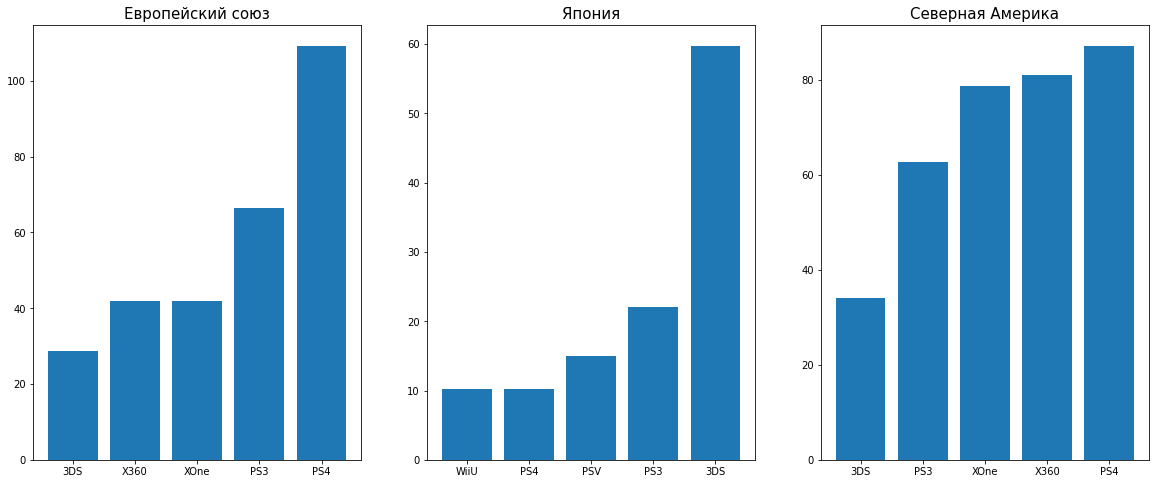

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,8))
ax1.bar(eu_index, eu_platform)
ax1.set_title("Европейский союз", fontsize = 15)

ax2.bar(jp_index, jp_platform)
ax2.set_title("Япония", fontsize = 15)

ax3.bar(na_index, na_platform)
ax3.set_title("Северная Америка", fontsize = 15)

plt.show()

Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5).
Для этого сначала сгруппируем каждый регион дважды: в первом возпользуемся index.tolist() будет возвращать список платформ, второй по сумме продаж. После этого построим график. Из графика мы видим:
- в Европейском Союзе и в Северной Америке по продажам лидируют игры на платорме "PS4". В целом ситуация очень похожа в данных регионах: присутсвуют одни и те же платформы. В то же время в Европе высокие позиции занимают платформы "PS3", для Северной Америки - "X360". Самое высокое значение здесь у платформы "PS4" в Европе.
- Совершенно иная картина в Японии: продаж PS4 гораздо меньше(почти в 8 раз по сравнению с Европейским союзом и Северной Америкой). Здесь лидером является 3DS. Из справки - в Японии Nintendo 3DS является одной из самых успешных систем за всю историю существования рынка.

In [ ]:
eu_ratio = life_data.groupby('platform')['eu_sales'].sum()
jp_ratio = life_data.groupby('platform')['jp_sales'].sum()
na_ratio = life_data.groupby('platform')['na_sales'].sum()

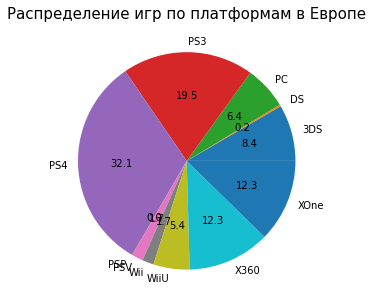

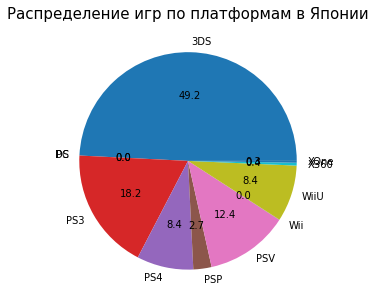

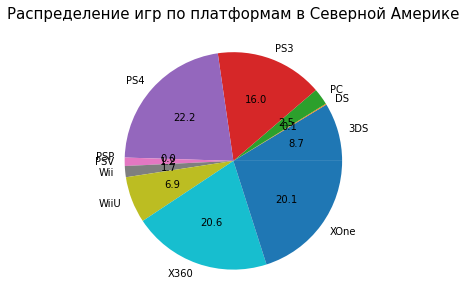

In [ ]:
platform_name_eu = eu_ratio.index
plt.figure(figsize=(5,5))
plt.pie(x = eu_ratio, labels = platform_name_eu, autopct = "%.1f")
plt.title('Распределение игр по платформам в Европе',fontsize=15)
plt.show()

platform_name_jp = jp_ratio.index
plt.figure(figsize=(5,5))
plt.pie(x = jp_ratio, labels = platform_name_jp, autopct = "%.1f")
plt.title('Распределение игр по платформам в Японии',fontsize=15)
plt.show()

platform_name_na = na_ratio.index
plt.figure(figsize=(5,5))
plt.pie(x = na_ratio, labels = platform_name_na, autopct = "%.1f")
plt.title('Распределение игр по платформам в Северной Америке',fontsize=15)
plt.show()


Для этой же задачи вывели круговую диаграмму в которой показаны продажи всех платформ в регионах в процентном соотношении.

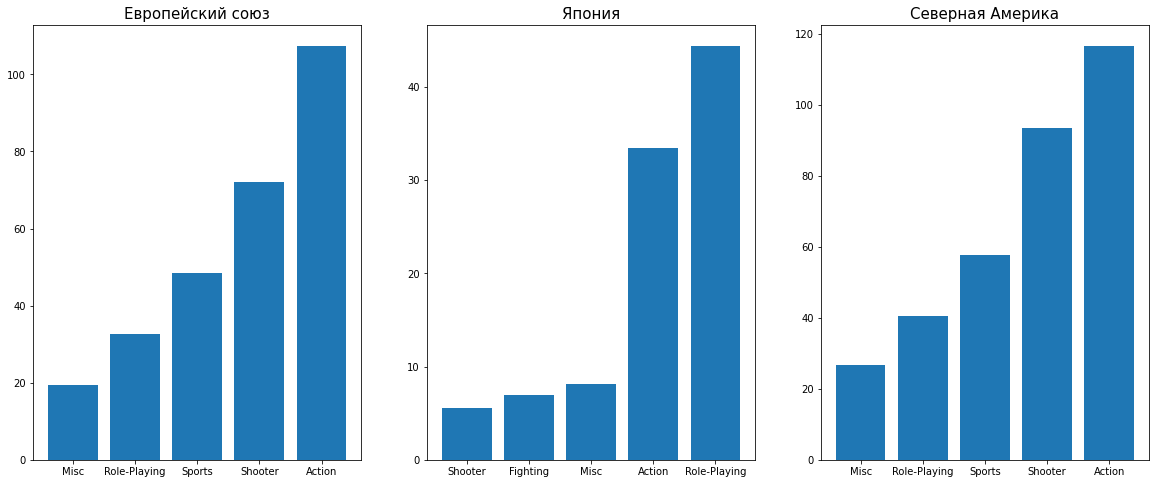

In [ ]:
eu_ind = life_data.groupby('genre')['eu_sales'].sum().sort_values()[-5:].index.tolist()
eu_genre = life_data.groupby('genre')['eu_sales'].sum().sort_values()[-5:]

jp_ind = life_data.groupby('genre')['jp_sales'].sum().sort_values()[-5:].index.tolist()
jp_genre = life_data.groupby('genre')['jp_sales'].sum().sort_values()[-5:]

na_ind = life_data.groupby('genre')['na_sales'].sum().sort_values()[-5:].index.tolist()
na_genre = life_data.groupby('genre')['na_sales'].sum().sort_values()[-5:]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,8))

ax1.bar(eu_ind, eu_genre)
ax1.set_title("Европейский союз", fontsize = 15)

ax2.bar(jp_ind, jp_genre)
ax2.set_title("Япония", fontsize = 15)

ax3.bar(na_ind, na_genre)
ax3.set_title("Северная Америка", fontsize = 15)
plt.show()

Выведем продажи инг по жанрам в регионах. Для этого воспользуемся предыщей формулой: в первой группировке возпользуемся index.tolist(), которая будет возвращать список платформ,во второй сгруппируем по сумме продаж. Построим график. Из полученных данных мы видим: 
- похожая ситуация наблюдается в Европе и Северной Америке. Для этих регионов топ-5 жанров одинаковые. Жанр "Action" занимает здесь первую строчку.
- в Японии продажи игр в жанре "Action" также высокие, однако на первом месте здесь "Role- Playing". В Японии появляется жанр "Fighting". Жанр "Shooter", который держится наверху списка в Европе и Северной Америке, в Японии заметно уступает другим жанрам.Из справки - существует отдельный жанр, Японская ролевая игра (Japanese Role-Playing Game или JRPG) — поджанр, выделяемый среди компьютерных ролевых игр. Игры этого жанра имеют схожие, узнаваемые особенности стиля, подачи сюжета и игровой механики, разительно отличающие их от RPG «западного образца». Из этого можно сделать вывод, что наличие даже поджанра определяет популярность "Role- Playing" в Японии.


"E" = Everyone (Для всех)
"E10+" = Everyone 10 and older» (Для всех от 10 лет и старше)
"T" = Teen(Для всех от 13 лет и старше)
"M" = Mature(Для всех от 17 лет)


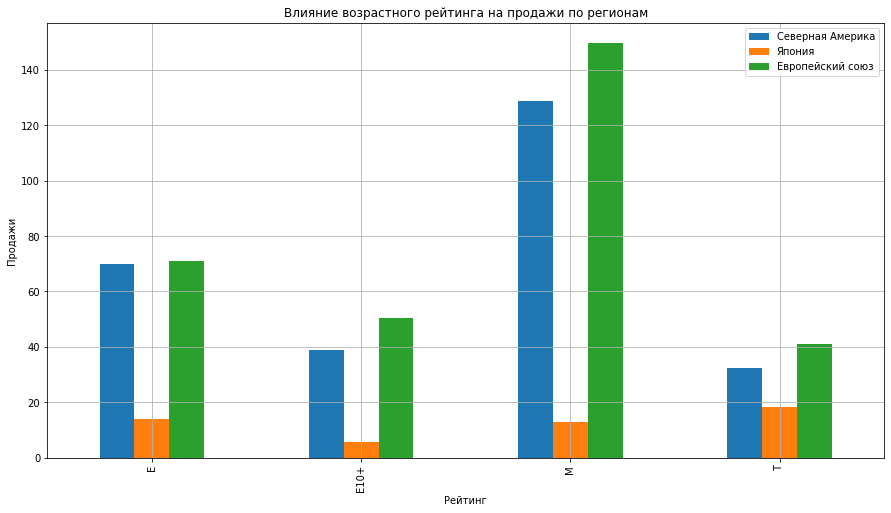

In [ ]:
esrb_rating = life_data.pivot_table(
    index = ['rating'], values = ['na_sales','jp_sales','eu_sales'], 
    aggfunc = ['sum'])

esrb_rating.columns = ['Северная Америка','Япония','Европейский союз']
print('"E" = Everyone (Для всех)')
print('"E10+" = Everyone 10 and older» (Для всех от 10 лет и старше)')
print('"T" = Teen(Для всех от 13 лет и старше)')
print('"M" = Mature(Для всех от 17 лет)')

esrb_rating.plot(kind = 'bar', figsize = (15,8),
                 title = 'Влияние возрастного рейтинга на продажи по регионам', 
                 grid = True)
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.show()

Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе. Для этого создадим сводную таблицу, в которой войдут сумма продаж по каждому из регионов и возрастной рейтинг игр. Поменяем название столюцов для наглядноси. Также пропишем, что означает каждый рейтинг и составим график. Из графика мы видим: 
- для Северной Америки и Европейского союза самые продаваемые игры с рейтингом "Mature(Для всех от 17 лет)", ниже всех расположился рейтинг "Teen(Для всех от 13 лет и старше)"
- для Японии, наоборот, игры продаются с рейтингом "Teen(Для всех от 13 лет и старше)"

### Вывод

  В данном разделе мы наглядно увидели, как различаются между собой Япония и Европейский Союз с Северной Америкой.
 - в Европейском Союзе и в Северной Америке по продажам лидируют игры на платорме "PS4". В целом ситуация очень похожа в данных регионах: присутсвуют одни и те же платформы. В Японии лидером является 3DS
 - для Европейского Союза и Северной Америки топ-5 жанров одинаковые. Жанр "Action" занимает здесь первую строчку. В Японии "главенствующем" жанром из-за специфики сраны является "Role-Playing"
 - для Европейского союза и Северной Америки самые продаваемые игры с рейтингом "Mature(Для всех от 17 лет)", в то же время в Японии - "Teen(Для всех от 13 лет и старше)"

## Проверем гипотезы

Необходимо проверить следующую утверждение: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Для этого сформулируем гипотезы:
- Нулевая гипотеза H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Альтернативная гипотеза H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

 параметр alpha =  5%
  
  Выделим методом query() строки с платформами.
  
  Проверим можем ли мы считать дисперсии выборок равными. 
  
  Они существенно различаются, значит - equal_var=False
  
  Также мы помним о пропусках в оценке пользователей. Т.к. пропусков слишком много, а с ними мы не сможем проверить гипотезы, удалим их.

In [ ]:
xone_platforms = life_data.query('platform == "XOne"')['user_score']
pc_platforms = life_data.query('platform == "PC"')['user_score']

In [ ]:
print('Дисперсия для XONE составляет {:.2f}'.format(xone_platforms.var()))
print('Дисперсия для PC составляет {:.2f}'.format(pc_platforms.var()))

Дисперсия для XONE составляет 1.66
Дисперсия для PC составляет 3.07


In [ ]:
alpha = 0.05

result = st.ttest_ind(xone_platforms.dropna(), pc_platforms.dropna(), equal_var = False)

print('p-значение:', result.pvalue)


if (result.pvalue > alpha):
    print("Не получилось отвергнуть нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу")

p-значение: 0.2867036680187632
Не получилось отвергнуть нулевую гипотезу


Необходимо проверить следующую утверждение: Средние пользовательские рейтинги жанров Action и Sports разные. Для этого сформулируем гипотезы:
- Нулевая гипотеза H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
- Альтернативная гипотеза H1: Средние пользовательские рейтинги жанров Action и Sports различаются

параметр alpha = 5%

Выделим методом query() строки с жанрами.

Проверим можем ли мы считать дисперсии выборок равными.

Они различаются, значит - equal_var=False

Также мы помним о пропусках в оценке пользователей. Т.к. пропусков слишком много, а с ними мы не сможем проверить гипотезы, удалим их.

In [ ]:
action_genre = life_data.query('genre == "Action"')['user_score']
sports_genre = life_data.query('genre == "Sports"')['user_score']

In [ ]:
print('Дисперсия для жанра Action составляет {:.2f}'.format(action_genre.var()))
print('Дисперсия для жанра Sports {:.2f}'.format(sports_genre.var()))

Дисперсия для жанра Action составляет 1.65
Дисперсия для жанра Sports 2.90


In [ ]:
alpha = 0.05

result = st.ttest_ind(action_genre.dropna(), sports_genre.dropna(), equal_var = False)

print('p-значение:', result.pvalue)


if (result.pvalue > alpha):
    print("Не получилось отвергнуть нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу")

p-значение: 3.5076737062533683e-19
Отвергаем нулевую гипотезу


Мы проверили оба утверждения. Из результатов мы делаем вывод:
 -  в первом утверждении, где фигурируют платформы "XOne" и "PC" не получилось опровергнуть Нулевую гипотезу. Есть вероятность того, средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
 - во втором утверждении, где сравниваются жанры "Action" и "Sports" мы опровергаем нулевую гипотезу. Вероятности получить одинакове средние рейнтинги по двум жанрам практически отсутствует.

## Вывод

- Перед началом анализа данных, мы подготовили нашу таблицу к дальнешему исследованию, привели к правильным данным столбцы, привели к нижнему регистру названия колонок, удалили пропущенные значения в столбцах 'year_of_release', 'genre' и 'name'. Длее мы определили, что аббревиатура TBD значит to be determined(предстоит определить). Скорее всего данные не были заполнены пользователями, либо часть пользователей просто не определились с рейтингом, заменили tbd на nan для проведения дальнейшего анализа
- Количество игр начало увеличиваться с большой скоростью с 1995 г. до 2009 г. После 2009 мы можем наблюдать спад игровой индустрией. Многие связывают это с появлением приложений и игр на мобильных устройствах.
- Самыми продаваемыми играми за все время стали игры на платформах "PS2", "X360" "PS3", "Wii".
- Из данных графиков мы видим, что игровые платформы в среднем существуют около 10 лет, пик продаж приходится примерно на 5 год после их появления. Из этого определили актуальный период рассмотрения (2013 - 2015).
- Провели анализ оценок пользователей и критиков и их влияние на продажи. Критики является важным фактором для продажи игр, в то время как зависимость между оценками пользователей и продажами почти отсутствует
- За актуальный период самый прибыльный жанр - "Action".
- Сравнили показатели Северной Америки, Европейского союза и Японии. Наглядно увидели, как отличается Япония от двух других регионов. Для Северной Америки и Европейского союза самые популярные жанры это Action, Shooter, Sports. Самые продаваемые игры на приставках "PS4". В то же время в Европе высокие позиции занимают платформы "PS3", для Северной Америки второе место по продажам занимает платформа "X360". А по рейтингу игр люди предпочитают игры с рейтингами: с рейтингом "Mature(Для всех от 17 лет)". Для Японии совершенно противоположная ситуация:лидером является 3DS продаж PS4 гораздо меньше (почти в 8 раз по сравнению с Европейским союзом и Северной Америкой). В Японии на первом месте здесь "Role - Playing". Как мы выяснили, существует отдельный жанр, Японская ролевая игра (Japanese Role-Playing Game или JRPG) — поджанр, выделяемый среди компьютерных ролевых игр, который и определяет высокие показатели жанра "Role - Playing". В Японии самым продаваемым продуктом стали игры с возрастным рейтингом "Teen(Для всех от 13 лет и старше)".
- проверили являются ли одинаковыми пользовательские рейтинги для различных жанров и платформ.

В связи с этим мы можем определить, что в 2017 г. необходимо обратить внимание на выпуск игр жанра "Action" на платформе "PS4". На данный момент данная платформа подходит к пику своих продаж, и возможно выпуск новых игр, их рекламное продвижение на рынках Северной Америки и Европейского союза позволит многократно увеличить выручку. В то же время необходимо держать в уме, что пользователи Японии предпочитают жанр "Role - Playing" и, возможно данный жанр, учитывая специфику региона, еще долго будет находиться в топах продаж в Японии.  
